In [105]:
# 전처리 : 머신러닝 모델에 훈련 데이터를 입력하기전에 데이터를 가공
# 머신러닝 기초수식   y = f(x)
# x: 훈련데이터(train data)  테스트데이터 둘다 동일한 feature를 가져야함

In [106]:
# 열(column) :  특성(feature), 속성(attribute), 변수(variable), field
# 행(row) : 개체(instance), 관측치(observed value), 기록(record),사례(example),경우(case)

In [107]:
# 데이터 품질의 문제...
# 1. 연속형 값 : 최대값과 최소값의 차이가 피처보다 많이 나는경우 
# 학습에 영향을 주기때문에 데이터의 스케일을 맞춰줌(scale)
# - 최대값과 최소값을 0 ~ 1사이의 가빗으로 바꾸거나 표준 정규분포형태로 나타냄

# 결측치(missing data)
# 1. 해당 데이터를 빼고 모델링을 한다.(데이터가 충분히 많은경우)
# 2. 너무 없을때는 .채워넣어서 모델링 - 평균,최빈값, 중간값

# 이상치 : 극단적으로 크거나 작을때

In [108]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
            'age': [42, np.nan, 36, 24, 73], 
            'sex': ['m', np.nan, 'f', 'm', 'f'], 
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df 


,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [109]:
# 결측치 찾는다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     4 non-null      object 
 1   last_name      4 non-null      object 
 2   age            4 non-null      float64
 3   sex            4 non-null      object 
 4   preTestScore   3 non-null      float64
 5   postTestScore  3 non-null      float64
dtypes: float64(3), object(3)
memory usage: 368.0+ bytes


In [110]:
df.isnull().sum() / len(df)

first_name      0.20
last_name       0.20
age             0.20
sex             0.20
preTestScore    0.40
postTestScore   0.40
dtype: float64

In [111]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [112]:
df_no_na =  df.dropna()
df_no_na

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [113]:
df.dropna(how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [114]:
df.dropna(how='any')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [115]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.00,m,4.00,25.00,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00,NaN
4,Amy,Cooze,73.00,f,3.00,70.00,NaN


In [116]:
df.dropna(how='all' ,axis = 1)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [117]:
copy_df = df

In [118]:
df.dropna(how='all', axis=1, inplace=True)

In [119]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [120]:
# thresh 데이터의 개수를 기준으로 삭제
# thresh = 1 데이터가 한개라도 존재하는 행은 남김
# thresh = 5 데이터가 5개 이상이어야 남긴다
df.dropna(axis=0,thresh=1)
df.dropna(how='all',axis = 0)


,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [121]:
df.dropna(axis=0,thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [122]:
# fillna : 빈 값을 채우기
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,0,0,0.00,0,0.00,0.00
2,Tina,Ali,36.00,f,0.00,0.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [123]:
# 모든 na을 일괄 처리하는 것보다는 컬럼별 평균값등으로 해당 컬럼의 na를 채운다
df['preTestScore'].fillna(df['preTestScore'].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,3.00,NaN
2,Tina,Ali,36.00,f,3.00,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [124]:
# 열별 분포를 고려해서 채울수 있음
df.groupby('sex')['postTestScore'].transform('mean')

0   43.50
1     NaN
2   70.00
3   43.50
4   70.00
Name: postTestScore, dtype: float64

In [125]:
# 일반적인 사용 방법은  transform을 사용하여 인덱스기바니으로 채운다
df['postTestScore'].fillna(
   df.groupby('sex')['postTestScore'].transform('mean') ,inplace=True
)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,3.00,NaN
2,Tina,Ali,36.00,f,3.00,70.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [126]:
# 범주형 데이터 전처리
# 서울 대전 대구 부산...
# [0,0,0,1]    [0,0,1,0]    
# 원핫인코딩(one-hot encording)
# color = {Green, Blue, Yellow}  인덱스를 0 1 2
#[1,0,0]  [0,1,0] [0,0,1]

In [127]:
# 판다스에서 제공하는 get_dummies함수  또는 scikit-learn  LebelEncoder, OneHotEncoder를 사용

In [128]:
edges =  pd.DataFrame(
    {
        'source':[0,1,2],
        'target':[2,2,3],
        'weight':[3,4,5],
        'color':['red','blue','blue']
    }
)
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [129]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [130]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [131]:
pd.get_dummies(edges['color'])

,blue,red
0,0,1
1,1,0
2,1,0


In [132]:
pd.get_dummies(edges[['color']])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [133]:
# weight 는 원래 범주형인데... 수치로 되어 있는 사실상  기수형 데이터
# M L XL로 되어 있었기 때문에 해당 문자로 변환하고 one-hot incording

In [134]:
weight_dic = {3:'M', 4:'L', 5:'XL'}
edges['weight_sign'] = edges['weight'].map(weight_dic)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [135]:
weight_sign =  pd.get_dummies(edges['weight_sign'])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [136]:
df =  pd.concat([edges,pd.get_dummies(edges['color']),weight_sign], axis=1)
df

,source,target,weight,color,weight_sign,blue,red,L,M,XL
0,0,2,3,red,M,0,1,0,1,0
1,1,2,4,blue,L,1,0,1,0,0
2,2,3,5,blue,XL,1,0,0,0,1


In [137]:
# 수치형 데이터를 빈도수를 조사해 보면... 범주형 데이터인지 추측이 가능
df['weight'].value_counts()

3    1
4    1
5    1
Name: weight, dtype: int64

In [138]:
# 바인딩(binding) : 연속형 데이터를 범주형 데이터로 변환

In [139]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df 

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [140]:
# postTestScore 범위를 0-25, 25-50 50-75 75-100
# cut 함수를 사용
bins = [0,25,50,75,100]
group_name = ['Low','Okay','Good','Great']
categories = pd.cut(df['postTestScore'],bins,labels=group_name)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [141]:
df = pd.concat([df,categories],axis=1)
df

,regiment,company,name,preTestScore,postTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


In [142]:
# 데이터의 크기를 맞추는 피처  스케일링
# 몸무게와 키를 하나의 모델에 넣으면 데이터의 범위가 훨씬 넓어진다.
# 키가 몸무게에 비해 모델에 과다하게 영향을 준다... 더 많은 가중치를 갖는다

In [143]:
# 최소값 - 최대값 정규화(min-max normalization)
# 최소값과 최대값을 기준으로 ㅐ에서 1 또는 0에서 지정한 값까지 값의 크기를 변화
# ( (xi-min(x)) / max(x) - min(x) ) (new.max - new.min) - new.max

In [144]:
# z-스코어 정규화(z-score normaliztion)
# 기존값을 표준 정규분포 값으로 변환
# (xi -  mean(x)) / std(x)

In [145]:
df = pd.DataFrame(
    {
        'A':[14.00,90.20,90.95,96.27,91.21],
        'B':[103.02,107.26,110.35,114.23,114.68],
        'C':['big','small','big','small','small']
    }
)
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [146]:
# xi-min(x)) / max(x) - min(x) 
df['A'] - df['A'].min()

0    0.00
1   76.20
2   76.95
3   82.27
4   77.21
Name: A, dtype: float64

In [147]:
# min-max normalization  최대 최소 정규화
(df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())

0   0.00
1   0.93
2   0.94
3   1.00
4   0.94
Name: A, dtype: float64

In [148]:
# z-스코어 정규화
# (xi -  mean(x)) / std(x)
(df['B'] - df['B'].mean()) / df['B'].std()

0   -1.41
1   -0.54
2    0.09
3    0.88
4    0.97
Name: B, dtype: float64

In [149]:
# 데이터 획득 -> 데이터 정제       ---> 훈련 데이터셋   --->  머신러닝 훈련  ----> 모델테스트  --> 모델평가
#               데이터 전처리                                     |                  |
#               피처 엔지니어링                                    ------------------            성능지표
#                  EDA                                              앙상블 방법으로               보고서
#                                                                 하이퍼 파라메터 튜닝            F1 등

In [150]:
# 타이타닉 생존자 예측하기
# 평가지표는 accuracy :  정확도

In [151]:
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

In [152]:
df_train = pd.read_csv("https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [153]:
df_test = pd.read_csv("https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [154]:
df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [155]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [156]:
# survived : 1. yes  0 no
# plcass : 1, 2, 3 객실등급
# SibSp : 타이타닉밖의 형제자매/부부의수
# Parch : 타이타닉밖의 부모/자식수
# Ticket : 티켓번호
# Fare : 가격
# Cabin : 객실번호
# Embarked : 승선항구   C Q S

In [157]:
# train 데이터의 수
number_of_train_dataset =  df.Survived.notnull().sum()
# test 데이터의 수
number_of_test_dataset =  df.Survived.isnull().sum()
# train데이터의 y값 추출  Survived
df[df.Survived.notnull()].Survived
# train데이터의 y값 추출  해서 결과를 리턴하는데. 원본에 제거
y_true = df.pop("Survived")[:number_of_train_dataset]

In [158]:
# 데이터 노트 작성
# 분석해야하는 데이터에 대한 여러가지 아이디어를 정리
# 타입.. 숫자로 표시되어 있지만 범주형 데이터로 변형이 필요한 경우

In [159]:
# 데이터의 모양을 확인할때 자주 사용
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [160]:
# 결측치 확인
# 열별로(Feature별로.. 독립변수별로) 결측치 비율을 확인하여 전략을 세움

# 소수점 두 번째자리까지 출력
pd.options.display.float_format = '{:.2f}'.format

In [161]:
# 각 컬럼(피처,독립변수)별로 결측치의 합을 데이터 개수로 나눈다.
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [162]:
# 데이터를 삭제할찌 의사결정
# 채우는 방법을 결정
df[df['Age'].notnull()].groupby(['Sex'])['Age'].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [163]:
df[df['Age'].notnull()].groupby(['Pclass'])['Age'].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [164]:
df['Age'].fillna(
    df.groupby('Pclass')['Age'].transform('mean'),inplace=True
)

In [165]:
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [166]:
df[df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN


In [167]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [168]:
df.Embarked =  df.Embarked.fillna("S")

In [222]:
df[df.Fare.isnull()]
df['Fare'].fillna(
    df.groupby('Pclass')['Fare'].transform('mean'),inplace=True
)

In [221]:
df.groupby('Pclass')['Fare'].transform('mean')

0      13.30
1      87.51
2      13.30
3      87.51
4      13.30
        ... 
1304   13.30
1305   87.51
1306   13.30
1307   13.30
1308   13.30
Name: Fare, Length: 1309, dtype: float64

In [169]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [170]:
# Cabin는 결측치가 77.46% 이므로 대체할 만한 적당한 값이 없다
# Cabin정보의 특징은 Pclass로 대처할 수 있음

In [231]:
# Cabin을 제거해 주세요.
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,24.82,1,1,2668,22.36,NaN,C


In [172]:
# 1. 제거 명령어를이용해서 제거
# 2. 슬라이싱 방법을 이용해서 Cabin만 제외한 새로운 DataFrame을 df로 치환한다.

In [224]:
#1번 방법
df2 = df.drop(['Cabin'],axis = 1)

#2번 방법
df.iloc[:,:-2]
df.iloc[:,-1]
df2 = pd.concat([df.iloc[:,:-2],df.iloc[:,-1]], axis = 1)

#3번 방법
new_cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked']
df2 = df.loc[:, new_cols]

In [225]:
# 범주형 데이터처리
# 데이터 형태에 따라서 처리방법 결정
df2.info()  # 열별로 데이터 타입을 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [232]:
# 데이터 타입정리
object_columns = ['Pclass','Name','Sex','Ticket','Embarked']   # 범주형 데이터
numeric_columns = ['Age','SibSp','Parch','Fare']  # 연속형 데이터

In [235]:
# 원핫인코딩 처리. 함수
def merge_and_get(ldf, rdf, on, how = "inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf,left_index=True, right_index=True, how=how,on=on)
    else:
        return pd.merge(ldf,rdf,how=how, on=on)

In [237]:
ont_hot_df = merge_and_get(df,pd.get_dummies(df['Sex'], prefix='Sex'),on=None,index=True )
ont_hot_df = merge_and_get(ont_hot_df,pd.get_dummies(df['Pclass'], prefix='Pclass'),on=None,index=True )
ont_hot_df = merge_and_get(ont_hot_df,pd.get_dummies(df['Embarked'], prefix='Embarked'),on=None,index=True )
ont_hot_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,1,0,0,1,0,0,1


In [242]:
# 데이터  시각화 진행
# 각 컬럼과 Y값과의 관계가 있는지를 확인
# 열별로 비교그래프를 나타내서 각 열이 생존여부에 영향을 주는지 시각적으로 확인
# 데이터 유형별로 y_true ㄷ이터의 분포변화가 있는지
import matplotlib.pyplot as plt

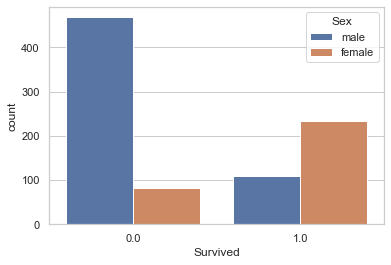

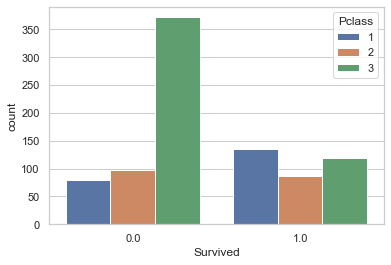

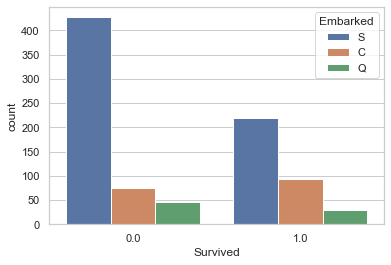

In [243]:

temp_columns = ['Sex','Pclass','Embarked']
for col_name in temp_columns:
    temp_df = pd.merge(ont_hot_df[col_name],y_true,left_index=True, right_index=True)
    sns.countplot(x='Survived', hue=col_name,data=temp_df)
    plt.show()

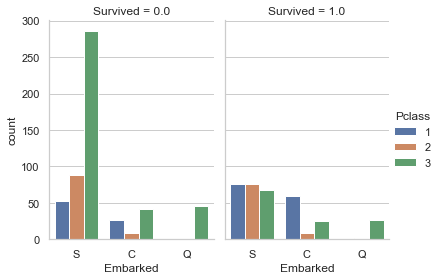

In [245]:
# 범주형 데이터 간 상간관계 분석
temp_df= pd.merge(ont_hot_df[temp_columns], y_true, left_index=True,right_index=True)
sns.catplot(x='Embarked', hue='Pclass',col='Survived',data=temp_df,kind="count",
            height=4, aspect=.7)
plt.show()

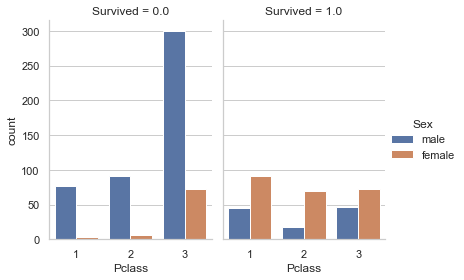

In [246]:
temp_df= pd.merge(ont_hot_df[temp_columns], y_true, left_index=True,right_index=True)
sns.catplot(x='Pclass', hue='Sex',col='Survived',data=temp_df,kind="count",
            height=4, aspect=.7)
plt.show()

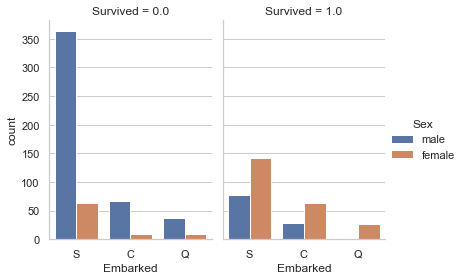

In [248]:
temp_df= pd.merge(ont_hot_df[temp_columns], y_true, left_index=True,right_index=True)
sns.catplot(x='Embarked', hue='Sex',col='Survived',data=temp_df,kind="count",
            height=4, aspect=.7)
plt.show()

In [262]:
# 상관계수(correlation) 시각화 -> heatmap
# corr 함수 -> 상관관계
corsscheck_columns =  [col_name for col_name in ont_hot_df.columns.to_list()
    if col_name.split("_")[0] in temp_columns and "_" in col_name] + ["Sex"]

corsscheck_columns

['Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex']

In [263]:
# temp열
temp_df = pd.merge(ont_hot_df[corsscheck_columns], y_true, left_index=True, right_index=True)
temp_df

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex,Survived
0,0,1,0,0,1,0,0,1,male,0.00
1,1,0,1,0,0,1,0,0,female,1.00
2,1,0,0,0,1,0,0,1,female,1.00
3,1,0,1,0,0,0,0,1,female,1.00
4,0,1,0,0,1,0,0,1,male,0.00
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1,male,0.00
887,1,0,1,0,0,0,0,1,female,1.00
888,1,0,0,0,1,0,0,1,female,0.00
889,0,1,1,0,0,1,0,0,male,1.00


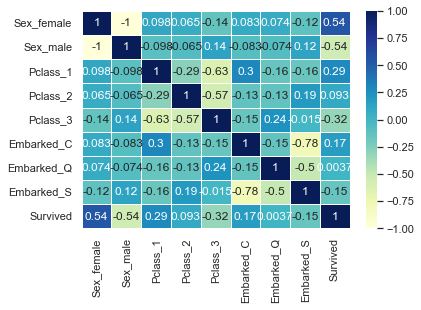

In [269]:
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr,annot=True, linewidths=.5,cmap='YlGnBu')